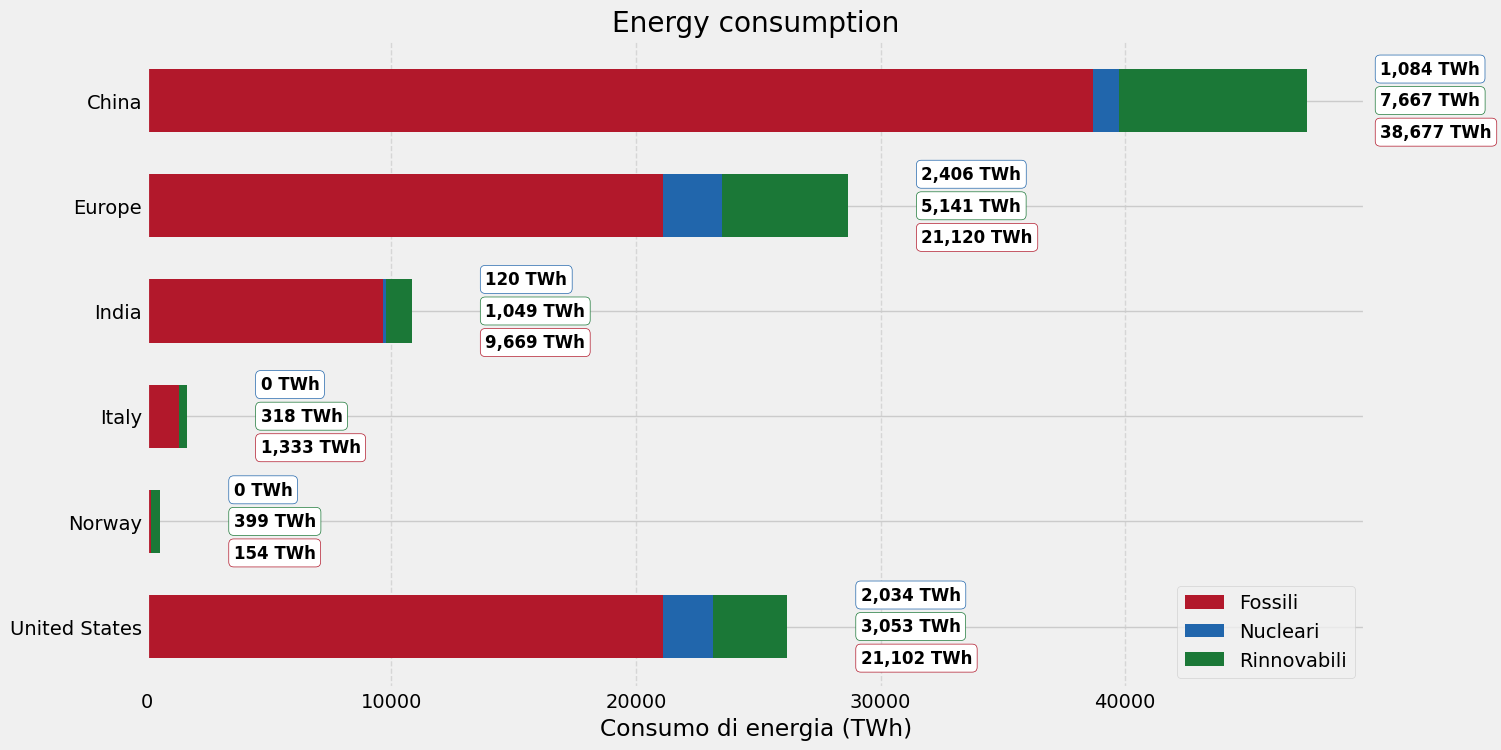

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Caricamento dati
dati = pd.read_csv('..\csv\consumi-e-produzioni\energy-consumption-by-source-and-country\energy-consumption-by-source-and-country.csv')
df = pd.DataFrame(dati)

# Filtraggio per paese e anno
df = df[df["Entity"].isin(["United States", "Europe", "China", "India", "Norway","Italy"])]
df = df[df["Year"] == 2023]

# Creazione delle categorie di energia (in TWh)
df["Renewables"] = df["Other renewables (including geothermal and biomass) - TWh"] + \
                   df["Biofuels consumption - TWh"] + df["Solar consumption - TWh"] + \
                   df["Wind consumption - TWh"] + df["Hydro consumption - TWh"]

df["Fossil Fuels"] = df["Gas consumption - TWh"] + df["Coal consumption - TWh"] + df["Oil consumption - TWh"]
df["Total Energy"] = df["Renewables"] + df["Fossil Fuels"] + df["Nuclear consumption - TWh"]

# Creazione del grafico a barre orizzontali con numeri assoluti
y = np.arange(len(df))
fig, ax = plt.subplots(figsize=(14, 8))

bar_height = 0.6  # Spessore delle barre
bar1 = ax.barh(y, df["Fossil Fuels"], color="#B2182B", label="Fossili", height=bar_height)
bar2 = ax.barh(y, df["Nuclear consumption - TWh"], left=df["Fossil Fuels"], color="#2166AC", label="Nucleari", height=bar_height)
bar3 = ax.barh(y, df["Renewables"], left=df["Fossil Fuels"] + df["Nuclear consumption - TWh"], color="#1B7837", label="Rinnovabili", height=bar_height)

# Aggiunta delle etichette vicino alla parte rinnovabile, una sotto l'altra
for i in range(len(df)):
    x_fossil = df["Fossil Fuels"].iloc[i]
    x_nuclear = x_fossil + df["Nuclear consumption - TWh"].iloc[i]
    x_renewable = x_nuclear + df["Renewables"].iloc[i]

    # Etichetta Fossili
    ax.annotate(f"{df['Fossil Fuels'].iloc[i]:,.0f} TWh", 
                xy=(x_fossil, i), 
                xytext=(x_renewable + 3000, i + 0.3),  # Posizione a destra e un po' in alto
                va='center', fontsize=12, color="black", fontweight="bold",
                bbox=dict(facecolor="white", edgecolor="#B2182B", boxstyle="round,pad=0.3"))

    # Etichetta Nucleare
    ax.annotate(f"{df['Nuclear consumption - TWh'].iloc[i]:,.0f} TWh", 
                xy=(x_nuclear, i), 
                xytext=(x_renewable + 3000, i - 0.3),  # Posizione a destra e un po' in basso
                va='center', fontsize=12, color="black", fontweight="bold",
                bbox=dict(facecolor="white", edgecolor="#2166AC", boxstyle="round,pad=0.3"))

    # Etichetta Rinnovabili
    ax.annotate(f"{df['Renewables'].iloc[i]:,.0f} TWh", 
                xy=(x_renewable, i), 
                xytext=(x_renewable + 3000, i),  # Posizione più a destra
                va='center', fontsize=12, color="black", fontweight="bold",
                bbox=dict(facecolor="white", edgecolor="#1B7837", boxstyle="round,pad=0.3"))

# Linee guida per leggibilità
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Personalizzazione dell'asse Y
ax.set_yticks(y)
ax.set_yticklabels(df["Entity"])
ax.set_xlabel("Consumo di energia (TWh)")
ax.set_title("Energy consumption")

# Legenda e layout
ax.legend()
plt.gca().invert_yaxis()
plt.show()


             Entity      Code  Year  \
1353          China       CHN  2023   
2077         Europe       NaN  2023   
2784          India       IND  2023   
3144          Italy       ITA  2023   
4568         Norway       NOR  2023   
6659  United States       USA  2023   
6998          World  OWID_WRL  2023   

      Other renewables (including geothermal and biomass) - TWh  \
1353                                         632.368600           
2077                                         640.732670           
2784                                         119.010450           
3144                                          60.824406           
4568                                           1.079450           
6659                                         202.682720           
6998                                        2427.861300           

      Biofuels consumption - TWh  Solar consumption - TWh  \
1353                   30.817583              1517.424200   
2077                  245.25

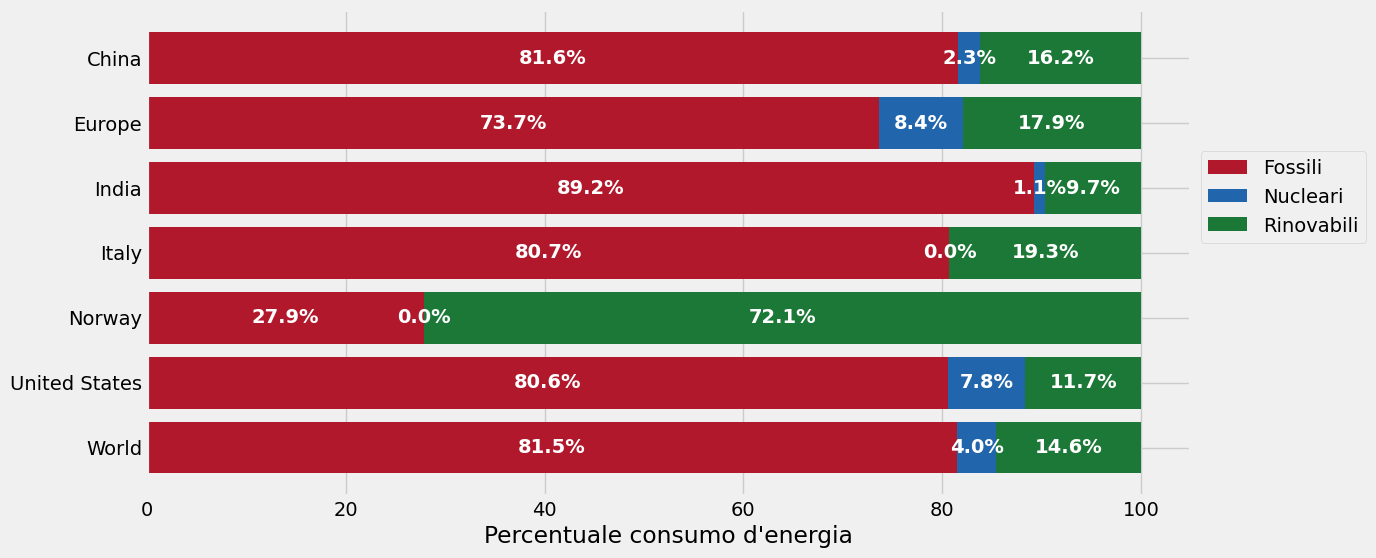

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

dati = pd.read_csv('..\csv\consumi-e-produzioni\energy-consumption-by-source-and-country\energy-consumption-by-source-and-country.csv')
df = pd.DataFrame(dati)
df=df[(df['Entity']=="United States") 
      | (df['Entity']=="Europe")
      | (df['Entity']=="China")
      | (df['Entity']=="India")
      | (df['Entity']=="Norway")
      |  (df['Entity']=="Italy")
      |  (df['Entity']=="World")]
df=df[df["Year"]==2023]

df["Renewables"]=df["Other renewables (including geothermal and biomass) - TWh"]+df["Biofuels consumption - TWh"]+df["Solar consumption - TWh"]+df["Wind consumption - TWh"]+df["Hydro consumption - TWh"]

df["Fossil Fuels"]=df["Gas consumption - TWh"]+df["Coal consumption - TWh"]+df["Oil consumption - TWh"]

df["Total Energy"]=df["Renewables"]+df["Fossil Fuels"]+df["Nuclear consumption - TWh"]


df["Fossil Fuels %"] = (df["Fossil Fuels"] / df["Total Energy"]) * 100
df["Nuclear %"] = (df["Nuclear consumption - TWh"] / df["Total Energy"]) * 100
df["Renewables %"] = (df["Renewables"] / df["Total Energy"]) * 100

# **Aggiungi questa linea per cambiare le dimensioni del grafico**
#plt.figure(figsize=(12, 6))  # Larghezza 12 pollici, Altezza 6 pollici. Regola questi valori a piacere.

print(df)

# Creazione del grafico
y = np.arange(len(df))
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(y, df["Fossil Fuels %"], color="#B2182B", label="Fossili")
ax.barh(y, df["Nuclear %"], left=df["Fossil Fuels %"], color="#2166AC", label="Nucleari")
ax.barh(y, df["Renewables %"], left=df["Fossil Fuels %"] + df["Nuclear %"], color="#1B7837", label="Rinovabili")

ax.set_yticks(y)
ax.set_yticklabels(df["Entity"])
ax.set_xlabel("Percentuale consumo d'energia")
#ax.set_title("Consumo di vari paesi nel 2023 (Percentuale)")
ax.legend()

# Aggiunta delle etichette di percentuale sulle barre
for i in range(len(df)):
    ax.text(df["Fossil Fuels %"].iloc[i] / 2, i, f"{df['Fossil Fuels %'].iloc[i]:.1f}%", va='center', ha='center', color="white", fontweight="bold")
    ax.text(df["Fossil Fuels %"].iloc[i] + df["Nuclear %"].iloc[i] / 2, i, f"{df['Nuclear %'].iloc[i]:.1f}%", va='center', ha='center', color="white", fontweight="bold")
    ax.text(df["Fossil Fuels %"].iloc[i] + df["Nuclear %"].iloc[i] + df["Renewables %"].iloc[i] / 2, i, f"{df['Renewables %'].iloc[i]:.1f}%", va='center', ha='center', color="white", fontweight="bold")



# **Modifica principale: Spostare la legenda fuori dal grafico a destra**
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5)) # Posiziona la legenda a destra, centrata verticalmente
plt.gca().invert_yaxis()
plt.show()
